In [1]:
import pandas as pd

# reading the data

In [2]:
data=pd.read_csv('train data.csv')

In [3]:
data
# the tweets which are labeled as 1 are anti_state tweets
# 0 represents the tweets that are not anti state

,tweet,length,label
0,Pakistani Terrorist Intelligence ISI and MI re...,245.0,1.0
1,Pakistani Terrorist Intelligence ISI and MI re...,245.0,1.0
2,Pakistani Terrorist Intelligence ISI and MI re...,264.0,1.0
3,Pakistani Terrorist Intelligence ISI and MI re...,239.0,1.0
4,Pakistani Terrorist Intelligence ISI and MI re...,242.0,1.0
...,...,...,...
1635,In sha Allah wo difah i Pakistan k liayay hom...,70.0,0.0
1636,Imran khan ne sabit kar deya hsi k wo allam a...,169.0,0.0
1637,Ameen,6.0,0.0
1638,You are face of GilgitBaltistan You are pride...,59.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tweet   1639 non-null   object 
 1   length  1633 non-null   float64
 2   label   1617 non-null   float64
dtypes: float64(2), object(1)
memory usage: 38.6+ KB


# checking for missing values

In [5]:
data.isna().value_counts()

tweet  length  label
False  False   False    1615
               True       18
       True    True        4
               False       2
True   True    True        1
dtype: int64

# dropping missing values

In [6]:
data=data.dropna()

In [7]:
data.isna().value_counts()

tweet  length  label
False  False   False    1615
dtype: int64

# visualizing missng values

<AxesSubplot:>

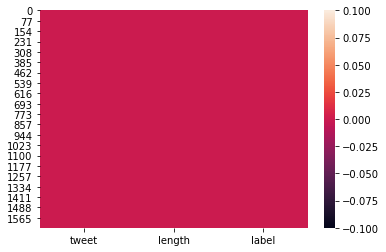

In [8]:
import seaborn as sns
sns.heatmap(data.isna())
# as we can see there's no missing values in our dataset

# checking the number of anti state and not anti state tweets

0.0    990
1.0    625
Name: label, dtype: int64


E:\ANACONDA_INSTALLED\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

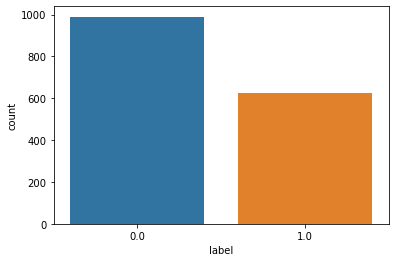

In [9]:
print(data['label'].value_counts())
sns.countplot(data['label'])


# dropping duplicate tweets if there's any

In [10]:
data=data.drop_duplicates()

In [11]:
data

,tweet,length,label
0,Pakistani Terrorist Intelligence ISI and MI re...,245.0,1.0
1,Pakistani Terrorist Intelligence ISI and MI re...,245.0,1.0
2,Pakistani Terrorist Intelligence ISI and MI re...,264.0,1.0
3,Pakistani Terrorist Intelligence ISI and MI re...,239.0,1.0
4,Pakistani Terrorist Intelligence ISI and MI re...,242.0,1.0
...,...,...,...
1635,In sha Allah wo difah i Pakistan k liayay hom...,70.0,0.0
1636,Imran khan ne sabit kar deya hsi k wo allam a...,169.0,0.0
1637,Ameen,6.0,0.0
1638,You are face of GilgitBaltistan You are pride...,59.0,0.0


# checking the longest and shortes tweet

In [12]:
data[data['tweet'] == data['tweet'].max()]


,tweet,length,label
1097,which is the best bank for saving accounts in ...,78.0,0.0


In [13]:
data[data['tweet'] == data['tweet'].min()]

,tweet,length,label
352,Very True...,321.0,1.0



# visualizing the length of tweets

<AxesSubplot:>

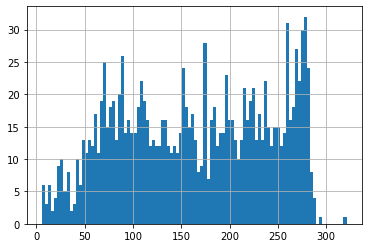

In [14]:
data['length'].hist(bins=100)

# removging spaces from begining of the tweet

In [15]:
data['tweet'].apply(lambda x:x.strip())

0       Pakistani Terrorist Intelligence ISI and MI re...
1       Pakistani Terrorist Intelligence ISI and MI re...
2       Pakistani Terrorist Intelligence ISI and MI re...
3       Pakistani Terrorist Intelligence ISI and MI re...
4       Pakistani Terrorist Intelligence ISI and MI re...
                              ...                        
1635    In sha Allah wo difah i Pakistan k liayay home...
1636    Imran khan ne sabit kar deya hsi k wo allam a ...
1637                                                Ameen
1638    You are face of GilgitBaltistan  You are pride...
1639    Aap b kin ko keh rahay hein ye opn jang ha aur...
Name: tweet, Length: 1323, dtype: object

# removing digits and punctuations if there's any

In [16]:
def removeDigits(tweet):
    import string
    tweet=tweet.strip()
    tweet=[t for t in tweet if t not in string.digits]
    tweet=''.join(tweet)
    tweet=[t for t in tweet if t not in string.punctuation]
    return ''.join(tweet)


In [17]:
data['tweet']=data['tweet'].apply(removeDigits)


# dividing the data into X and Y to train the model

In [18]:
X=data['tweet']

In [19]:
trainY=data['label']

# transforming the tweets into vectors

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vectorizer=CountVectorizer()

In [22]:
trainX=vectorizer.fit_transform(X)

# checking the feature names

In [23]:
vectorizer.get_feature_names()

['aa',
 'aaate',
 'aadhaar',
 'aafia',
 'aag',
 'aaga',
 'aai',
 'aajayegi',
 'aakar',
 'aake',
 'aakhri',
 'aakr',
 'aam',
 'aap',
 'aapne',
 'aaropi',
 'aata',
 'aate',
 'aaya',
 'aaye',
 'aayi',
 'ab',
 'abad',
 'abandoned',
 'abasin',
 'abd',
 'abducted',
 'abducting',
 'abductor',
 'abdul',
 'abdullah',
 'abdullahs',
 'abe',
 'abhi',
 'abhinandan',
 'abhinandanwion',
 'abi',
 'abiding',
 'ability',
 'ablaze',
 'able',
 'aboriginal',
 'about',
 'above',
 'abparaa',
 'abro',
 'abroad',
 'absconding',
 'absence',
 'absolutely',
 'abt',
 'abu',
 'abujakaduna',
 'abuse',
 'abused',
 'abuses',
 'abusing',
 'aby',
 'ac',
 'accelerated',
 'accept',
 'accepted',
 'accepting',
 'accetenly',
 'accha',
 'accident',
 'acclaimed',
 'accompanied',
 'accompany',
 'according',
 'accords',
 'account',
 'accountability',
 'accountable',
 'accounts',
 'accuse',
 'accused',
 'accuses',
 'acha',
 'achakzai',
 'achanak',
 'ache',
 'acheivement',
 'achi',
 'achieve',
 'achuka',
 'ackan',
 'acknowledge',


In [24]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

# model training using svm

In [25]:
from sklearn.svm import SVC

In [26]:
model=SVC(kernel='linear')

In [27]:
model.fit(trainX,trainY)

SVC(kernel='linear')

# loading the test data

In [28]:
test_data=pd.read_csv('testingdata.csv')
test_data=test_data.dropna()
X_test=vectorizer.transform(test_data['tweet'])
Y_test=test_data['label']


In [29]:
pred=model.predict(X_test)

# model evaluation of SVC

In [30]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [31]:
print(accuracy_score(pred,Y_test))

0.8595744680851064


In [32]:
print(confusion_matrix(pred,Y_test))

[[138  16]
 [ 17  64]]


In [33]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       154
         1.0       0.80      0.79      0.80        81

    accuracy                           0.86       235
   macro avg       0.85      0.84      0.84       235
weighted avg       0.86      0.86      0.86       235



<AxesSubplot:>

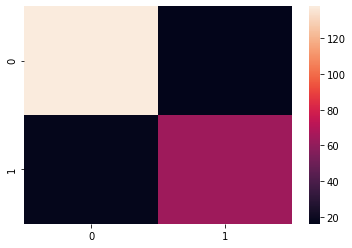

In [34]:
sns.heatmap(confusion_matrix(pred,Y_test))

# trying another algorithm Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lg=LogisticRegression()

In [37]:
lg.fit(trainX,trainY)

LogisticRegression()

In [38]:
predlg=lg.predict(X_test)

# evaluation of Logistic Regression

In [39]:
print(accuracy_score(predlg,Y_test))

0.8468085106382979


In [40]:
print(classification_report(predlg,Y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89       159
         1.0       0.75      0.79      0.77        76

    accuracy                           0.85       235
   macro avg       0.82      0.83      0.83       235
weighted avg       0.85      0.85      0.85       235



<AxesSubplot:>

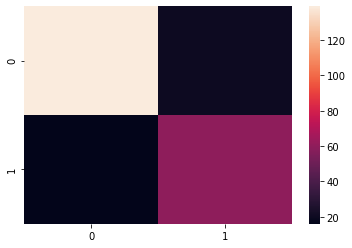

In [41]:
sns.heatmap(confusion_matrix(predlg,Y_test))

# Trying Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
randomforest=RandomForestClassifier()

In [44]:
randomforest.fit(trainX,trainY)

RandomForestClassifier()

# Evaluating Random Forest Classifier

In [45]:
predrandomF=randomforest.predict(X_test)

In [46]:
print(classification_report(predrandomF,Y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       155
         1.0       0.79      0.79      0.79        80

    accuracy                           0.86       235
   macro avg       0.84      0.84      0.84       235
weighted avg       0.86      0.86      0.86       235



In [47]:
accuracy_score(predrandomF,Y_test)

0.8553191489361702

In [48]:
confusion_matrix(predrandomF,Y_test)

array([[138,  17],
       [ 17,  63]], dtype=int64)

<AxesSubplot:>

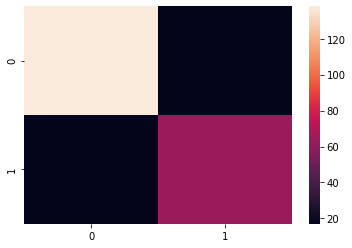

In [49]:
sns.heatmap(confusion_matrix(predrandomF,Y_test))

In [52]:
KNN.fit(trainX,trainY)

KNeighborsClassifier()

In [53]:
predknn=KNN.predict(X_test)

# evaluation of KNN

In [54]:
print(classification_report(predknn,Y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82       199
         1.0       0.33      0.72      0.45        36

    accuracy                           0.73       235
   macro avg       0.63      0.73      0.63       235
weighted avg       0.84      0.73      0.76       235



In [55]:
confusion_matrix(predknn,Y_test)

array([[145,  54],
       [ 10,  26]], dtype=int64)

In [56]:
accuracy_score(predknn,Y_test)

0.7276595744680852

<AxesSubplot:>

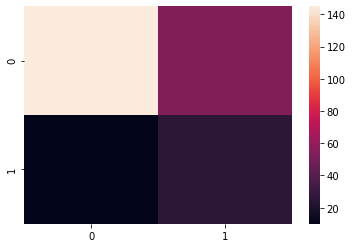

In [57]:
sns.heatmap(confusion_matrix(predknn,Y_test))

# as we have noticed that RandomForestClassifier is giving us the highest accuracy so we will use that model.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer , CountVectorizer

# using a pipeline to save the model for deployment

In [59]:
pipe=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('trnasformer',TfidfTransformer()),
    ('model' , RandomForestClassifier())
    
]) 

In [60]:
pipe.fit(X,trainY)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('trnasformer', TfidfTransformer()),
                ('model', RandomForestClassifier())])

# evaluating our pipeline

In [61]:
pred=pipe.predict(test_data['tweet'])


In [62]:
accuracy_score(pred,test_data['label'])

0.8595744680851064

In [63]:
print(classification_report(pred,test_data['label']))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89       156
         1.0       0.79      0.80      0.79        79

    accuracy                           0.86       235
   macro avg       0.84      0.84      0.84       235
weighted avg       0.86      0.86      0.86       235



In [64]:
confusion_matrix(pred,test_data['label'])

array([[139,  17],
       [ 16,  63]], dtype=int64)

<AxesSubplot:>

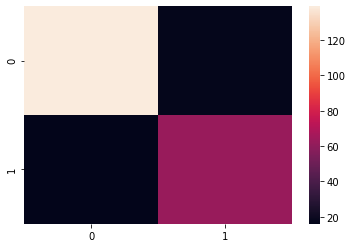

In [65]:
sns.heatmap(confusion_matrix(pred,test_data['label']))

In [66]:
import pickle

# saving our model using pickle

In [67]:
pickle.dump(pipe,open('my_model.pkl','wb'))

In [68]:
# loading and checking if our saved model works

In [69]:
RandomForest=pickle.load(open('my_model.pkl','rb'))

In [70]:
preds=RandomForest.predict(test_data['tweet'])


In [71]:
accuracy_score(preds,Y_test)

0.8595744680851064

In [80]:
preds=RandomForest.predict(test_data['tweet'][:100])     
preds

array([1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.])

In [78]:
result={}
for i,j in zip(test_data['tweet'][:100],preds):
    if j==0.0:
        result[i]='Not anti State'
    else:
        result[i]='Anit State'

In [79]:
result

{'  The world knows that Pakistan is in itself a terrorist state run by the toons of the ISI and the Pakistan Army Kashmir went to flames at the behest of Pakistan in 1989 when BJP was not anywhere near power of Delhi and is still burning and shall keep so till Pak fuels it': 'Anit State',
 'We do not need your sympathy but controlling  THUGs   ': 'Not anti State',
 ' Pakistan is a terrorist state yesterdays terrorist TTP is going to reconcile with ISI we highly condemn all relations among states and terrorist groups ISIPak Army ISISTerrorist': 'Anit State',
 '   was brought to the power by Pak Army and ISI to destroy Pashtoons Thats why he won in KPK first and then in Federal   for Pakistan is a terrorist state  ': 'Anit State',
 ' A country who harbours nurtures helps terrorists since ages is a terrorist state  ISI PAK ARMY help  terrorists infiltrate Bottomline  pakistan is a terrorist state and  is a TERRORIST    ': 'Anit State',
 'American strategists thought they can defeat Talib